<a href="https://colab.research.google.com/github/ptleskin/QuasiRandomCircle/blob/main/QuasiRandomCircleFill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quasi Random Circle Fill
This colab is a Python adaptation of my old code at [Pixelero blog](https://pixelero.wordpress.com/2014/11/26/spiral-moire/).

# Set up dependencies and imports

In [1]:
!pip install numpy scipy matplotlib networkx ipywidgets
%matplotlib inline

# this will allow the notebook to reload/refresh automatically within the runtime
%reload_ext autoreload
%autoreload 2

In [2]:
import ipywidgets
from ipywidgets import interact

import matplotlib.pyplot as plt
import numpy    as np
import networkx as nx
import re
from scipy.spatial import Delaunay

# Function definitions

In [3]:
def repeat(arr, N):
  ''' repeat the iterable arr until the length N '''
  for i in range(N):
    yield arr[i%len(arr)]


def formSpiral(N, f, pow=0.5):
  ''' spread N points along a spiral inside a unit circle '''
  # by default value pow=0.5 this is a square root
  theta = np.power(range(N),pow)
  radii = theta/max(theta)
  return radii*np.cos(f*theta), radii*np.sin(f*theta)


def drawSpiral(ax, X,Y, S=None, C=None):
  ''' render the spiral
  S: size by dot
  C: color by dot
  '''
  if S:
    sizes = np.array(list(repeat(S, len(X))))
    sizes = 3*sizes*sizes
  else:
    sizes = None

  if C:
    colors = list(repeat(C, len(X)))
  else:
    colors = None
  
  ax.scatter(X,Y, s=sizes, c=colors)

# Interactive rendering

In [4]:
S = [5-len(re.sub('0+$', '', '{0:04b}'.format(x))) for x in range(16)]
C = [6-len(re.sub('0+$', '', '{0:04b}'.format(x))) for x in range(16)]

def updateSpiral(f, N=1000, pow=0.5):
  fig = plt.figure(figsize=[12.0, 12.0])
  ax = fig.add_subplot(1, 1, 1)
  
  drawSpiral(ax, *formSpiral(N, f, pow), S=S, C='k')
  
  ax.axis("off")
  ax.set_aspect('equal')

  plt.show()
  return f

In [5]:
_ = ipywidgets.interact(updateSpiral, 
                      N=ipywidgets.IntSlider(min=100, max=10000, step=25, value=1000, continuous_update=False),
                      f=ipywidgets.FloatSlider(min=1.0, max=20.0, step=0.05, value=3.2, continuous_update=False),
                      pow=ipywidgets.FloatSlider(min=0.25, max=0.90, step=0.01, value=0.5, continuous_update=False)
                      )

interactive(children=(FloatSlider(value=3.2, continuous_update=False, description='f', max=20.0, min=1.0, step…

# Render the spiral as a minimum spanning tree

In [58]:
def graphSpiral(f, N=1000, pow=0.5):
  fig = plt.figure(figsize=[14.0, 14.0])
  ax = fig.add_subplot(111)

  # form the spiral and apply a Delaunay triangulation
  X,Y = formSpiral(N, f, pow)
  XY = np.array(list(zip(X,Y))) 
  tri = Delaunay(XY)

  # get the edges of the triangulation
  edges = list(tri.simplices[:,[0,1]])+list(tri.simplices[:,[1,2]])+list(tri.simplices[:,[2,0]])
  edges = set([(min(x), max(x)) for x in edges])
  dists = [(u,v, np.linalg.norm(XY[u]-XY[v])) for (u,v) in edges]

  # build a graph and extract the minimum spanning tree
  G = nx.Graph()
  G.add_weighted_edges_from(dists)
  T=nx.minimum_spanning_tree(G)

  # render the graph
  nx.drawing.draw_networkx(T,
                          pos=dict([(u, XY[u]) for u in T.nodes()]),
                          edge_color='grey',
                          width=5,
                          node_size=20,
                          with_labels=False,
                          node_color='black'
                          )

  plt.show()  
  return f, N

In [59]:
_ = ipywidgets.interact(graphSpiral, 
                      N=ipywidgets.IntSlider(min=100, max=2500, step=10, value=750, continuous_update=False),
                      f=ipywidgets.FloatSlider(min=1.0, max=20.0, step=0.05, value=11.1, continuous_update=False),
                      pow=ipywidgets.FloatSlider(min=0.25, max=0.75, step=0.01, value=0.5, continuous_update=False)
                      )

interactive(children=(FloatSlider(value=11.1, continuous_update=False, description='f', max=20.0, min=1.0, ste…

# Quasi Random fillings for a Square
In the visualizations in this block a similar filling is applied to a square. The square shape is achieved by replacing the cosine and sine functions with corresponding functions for L1-metrics.

These L1-counterparts for cosine and sine are partially defined functions and plotted below.

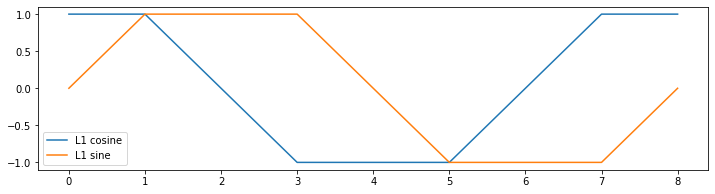

In [55]:
def cos1(x):
  '''
  Variation of cosine for L1 metric
  '''
  x = (x-1)%8.0
  if x<2:
    return 1.0-x
  elif x<4:
    return -1.0
  elif x<6:
    return x-5.0
  else:
    return 1.0
  
def sin1(x):
  '''
  Variation of sine for L1 metric
  '''
  return cos1(x-2.0)

X=np.linspace(0,8, 9)
Y=np.vectorize(cos1)(X)
Y2=np.vectorize(sin1)(X)

fig = plt.figure(figsize=[12.0, 3.0])
ax = fig.add_subplot(1, 1, 1)

ax.plot(X,Y, label="L1 cosine"), ax.plot(X,Y2, label="L1 sine")
ax.legend()

plt.show()

In [44]:
def formSquareSpiral(N, f, pow=0.5):
  ''' spread N points along a spiral inside a unit square '''
  # by default value pow=0.5 this is a square root
  theta = np.power(range(N),pow)
  radii = theta/max(theta)
  return radii*np.vectorize(cos1)(f*theta), radii*np.vectorize(sin1)(f*theta)

S = [5-len(re.sub('0+$', '', '{0:04b}'.format(x))) for x in range(16)]
C = [6-len(re.sub('0+$', '', '{0:04b}'.format(x))) for x in range(16)]

def updateSquareSpiral(f, N=1000, pow=0.5):
  fig = plt.figure(figsize=[12.0, 12.0])
  ax = fig.add_subplot(1, 1, 1)
  
  drawSpiral(ax, *formSquareSpiral(N, f, pow), S=[3], C='k')
  
  ax.axis("off")
  ax.set_aspect('equal')

  plt.show()
  return f

In [45]:
_ = ipywidgets.interact(updateSquareSpiral, 
                      N=ipywidgets.IntSlider(min=100, max=10000, step=25, value=4000, continuous_update=False),
                      f=ipywidgets.FloatSlider(min=1.0, max=20.0, step=0.01, value=13.80, continuous_update=False),
                      pow=ipywidgets.FloatSlider(min=0.25, max=0.90, step=0.01, value=0.5, continuous_update=False)
                      )

interactive(children=(FloatSlider(value=13.8, continuous_update=False, description='f', max=20.0, min=1.0, ste…

In [60]:
def graphSquareSpiral(f, N=1000, pow=0.5):
  fig = plt.figure(figsize=[14.0, 14.0])
  ax = fig.add_subplot(111)

  # form the spiral and apply a Delaunay triangulation
  X,Y = formSquareSpiral(N, f, pow)
  XY = np.array(list(zip(X,Y))) 
  tri = Delaunay(XY)

  # get the edges of the triangulation
  edges = list(tri.simplices[:,[0,1]])+list(tri.simplices[:,[1,2]])+list(tri.simplices[:,[2,0]])
  edges = set([(min(x), max(x)) for x in edges])
  dists = [(u,v, np.linalg.norm(XY[u]-XY[v])) for (u,v) in edges]

  # build a graph and extract the minimum spanning tree
  G = nx.Graph()
  G.add_weighted_edges_from(dists)
  T=nx.minimum_spanning_tree(G)

  # render the graph
  nx.drawing.draw_networkx(T,
                          pos=dict([(u, XY[u]) for u in T.nodes()]),
                          edge_color='grey',
                          width=5,
                          node_size=20,
                          with_labels=False,
                          node_color='black'
                          )

  plt.show()  
  return f, N


In [62]:
_ = ipywidgets.interact(graphSquareSpiral, 
                      N=ipywidgets.IntSlider(min=100, max=2500, step=10, value=1200, continuous_update=False),
                      f=ipywidgets.FloatSlider(min=1.0, max=20.0, step=0.05, value=11.0, continuous_update=False),
                      pow=ipywidgets.FloatSlider(min=0.25, max=0.75, step=0.01, value=0.5, continuous_update=False)
                      )

interactive(children=(FloatSlider(value=11.0, continuous_update=False, description='f', max=20.0, min=1.0, ste…

# Quasi Random fillings for a Triangle
In the visualizations in this block a similar filling is applied to a triangle. The triangular shape is achieved by replacing the cosine and sine functions with corresponding functions for triangular metrics.

These triangle-counterparts for cosine and sine are partially defined functions and plotted below.

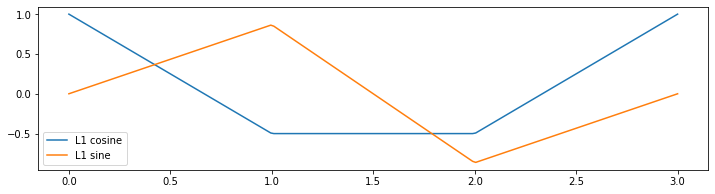

In [70]:
def cos_tri(x):
  '''
  Variation of cosine for triangular metric
  '''
  x = (x)%3.0
  if x<1:
    return 1.0-1.5*x
  elif x<2:
    return -0.5
  else:
    return 1.5*x-3.5
  
def sin_tri(x, s=(3**0.5)/2):
  '''
  Variation of sine for L1 metric
  '''
  x = (x)%3.0
  if x<1:
    return s*x
  elif x<2:
    return (3-2*x)*s
  else:
    return (x-3)*s

X=np.linspace(0,3, 200)
Y=np.vectorize(cos_tri)(X)
Y2=np.vectorize(sin_tri)(X)

fig = plt.figure(figsize=[12.0, 3.0])
ax = fig.add_subplot(1, 1, 1)

ax.plot(X,Y, label="L1 cosine"), ax.plot(X,Y2, label="L1 sine")
ax.legend()

plt.show()

In [80]:
def formTriangleSpiral(N, f, pow=0.5):
  ''' spread N points along a spiral inside a unit triangle '''
  # by default value pow=0.5 this is a square root
  theta = np.power(range(N),pow)
  radii = theta/max(theta)
  return radii*np.vectorize(sin_tri)(f*theta), radii*np.vectorize(cos_tri)(f*theta)

S = [5-len(re.sub('0+$', '', '{0:04b}'.format(x))) for x in range(16)]
C = [6-len(re.sub('0+$', '', '{0:04b}'.format(x))) for x in range(16)]

def updateTriangleSpiral(f, N=1000, pow=0.5):
  fig = plt.figure(figsize=[12.0, 10.4])
  ax = fig.add_subplot(1, 1, 1)
  
  drawSpiral(ax, *formTriangleSpiral(N, f, pow), S=[2], C='k')
  
  ax.axis("off")
  ax.set_aspect('equal')

  plt.show()
  return f

In [82]:
_ = ipywidgets.interact(updateTriangleSpiral, 
                      N=ipywidgets.IntSlider(min=100, max=5000, step=25, value=2500, continuous_update=False),
                      f=ipywidgets.FloatSlider(min=1.0, max=20.0, step=0.01, value=7.91, continuous_update=False),
                      pow=ipywidgets.FloatSlider(min=0.25, max=0.90, step=0.01, value=0.5, continuous_update=False)
                      )

interactive(children=(FloatSlider(value=7.91, continuous_update=False, description='f', max=20.0, min=1.0, ste…